## In this notebook we will develop a lightweight algorithm for determining the flattop phase from the plasma current

In [1]:
using AlfvenDetectors
using PyPlot
using StatsBase

In [2]:
datapath = "/home/vit/vyzkum/alfven/cdb_data/data_sample/";

In [3]:
shots = readdir(datapath)

16-element Array{String,1}:
 "Jldata10000.h5"
 "Jldata10001.h5"
 "Jldata10002.h5"
 "Jldata10003.h5"
 "Jldata10004.h5"
 "Jldata10005.h5"
 "Jldata10006.h5"
 "Jldata10007.h5"
 "Jldata10008.h5"
 "Jldata10370.h5"
 "Jldata10514.h5"
 "Jldata10800.h5"
 "Jldata10866.h5"
 "Jldata10870.h5"
 "Jldata10893.h5"
 "Jldata10975.h5"

In [4]:
function getip()
    Ip = []
    for shot in shots
        push!(Ip, AlfvenDetectors.readip(joinpath(datapath, shot)))
    end
    return Ip
end

getip (generic function with 1 method)

In [24]:
Ips = getip();
filter!(x->length(x)>1,Ips)
N = length(Ips)

┌ Warning: /home/vit/vyzkum/alfven/cdb_data/data_sample/Jldata10975.h5: I_plasma data not found
└ @ AlfvenDetectors /home/vit/.julia/environments/v1.1/dev/AlfvenDetectors/src/data.jl:146


15

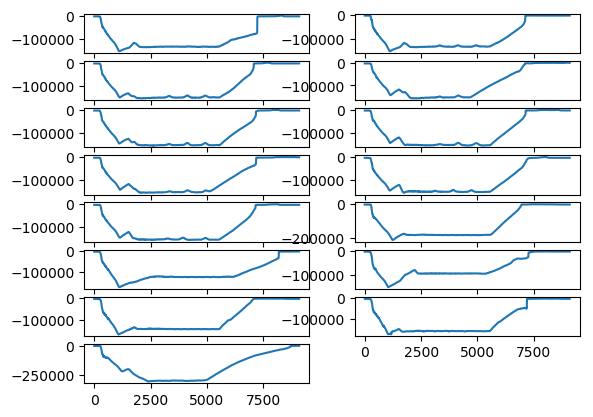

In [26]:
for i in 1:N
    subplot(ceil(Int, N/2),2,i)
    plot(Ips[i])
end

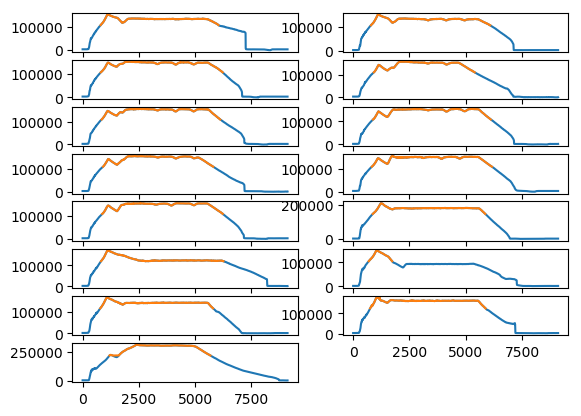

In [27]:
for i in 1:N
    subplot(ceil(Int, N/2),2,i)
    ip = AlfvenDetectors.makepositive(Ips[i])
    ts = collect(1:length(ip))
    plot(ts,ip)
    ftinds = AlfvenDetectors.maxflattop(ip)
    plot(ts[ftinds], ip[ftinds])
end

### what about the derivative

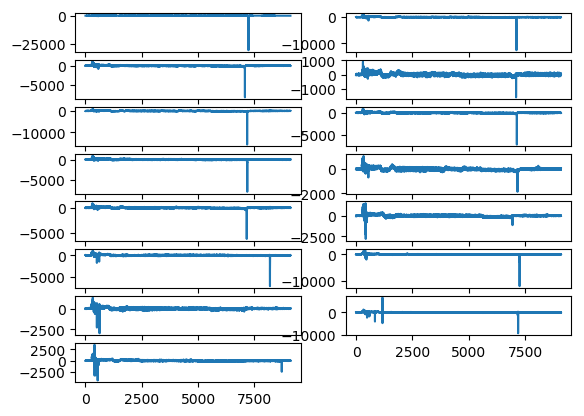

In [28]:
for i in 1:N
    subplot(ceil(Int, N/2),2,i)
    ip = AlfvenDetectors.makepositive(Ips[i])
    dipdt = diff(ip)
    plot(dipdt)
end

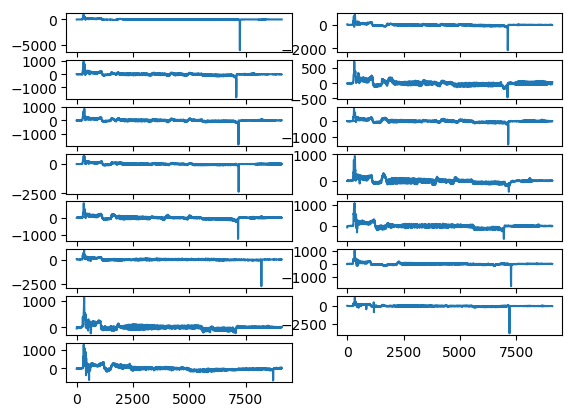

In [29]:
for i in 1:N
    subplot(ceil(Int, N/2),2,i)
    ip = AlfvenDetectors.makepositive(Ips[i])
    dipdt = diff(ip)
    #dipdt = diff(movingmean(ip,10))
    plot(AlfvenDetectors.movingmean(dipdt,10))
end

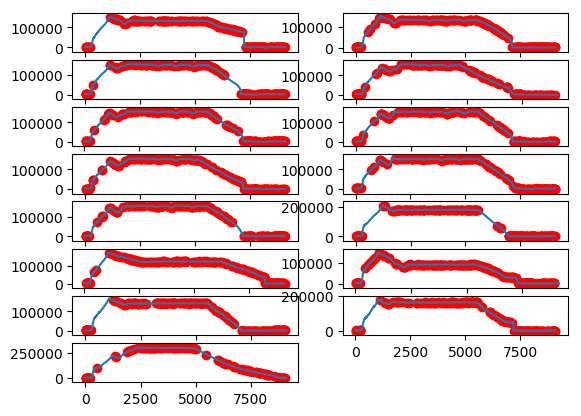

In [30]:
for i in 1:N
    subplot(ceil(Int, N/2),2,i)
    ip = AlfvenDetectors.makepositive(Ips[i])
    ts = collect(1:length(ip))
    plot(ts, ip)
    inds = AlfvenDetectors.diffflattop(ip)
    scatter(ts[inds], ip[inds],c="r")
end

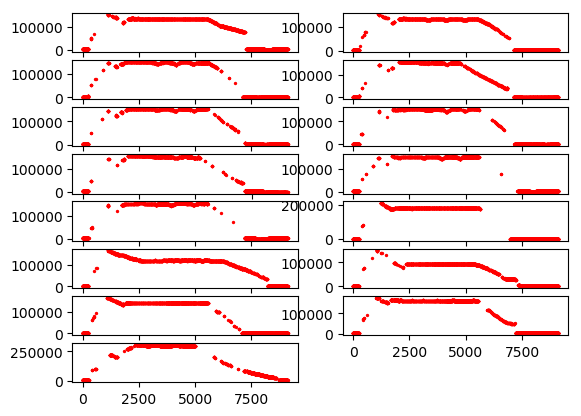

In [32]:
for i in 1:N
    subplot(ceil(Int, N/2),2,i)
    ip = AlfvenDetectors.makepositive(Ips[i])
    ts = collect(1:length(ip))
#    plot(ts, ip)
    inds = AlfvenDetectors.diffflattop(ip,1e-4,wl=10)
    scatter(ts[inds], ip[inds],c="r",s=2)
end

### combine them together

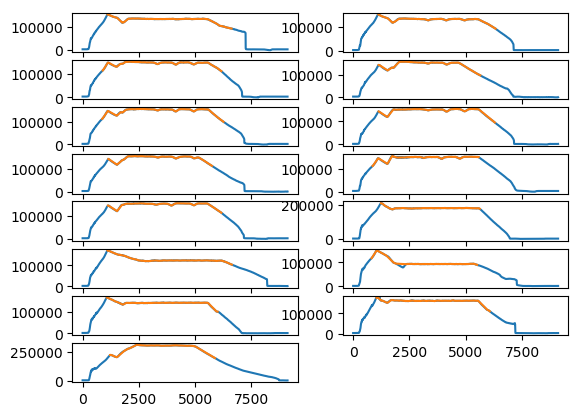

In [33]:
for i in 1:N
    subplot(ceil(Int, N/2),2,i)
    ip = AlfvenDetectors.makepositive(Ips[i])
    ts = collect(1:length(ip))
    plot(ts, ip)
    inds = AlfvenDetectors.diffmaxflattop(ip,0.6,1e-4;wl=10)
    plot(ts[inds], ip[inds])
end

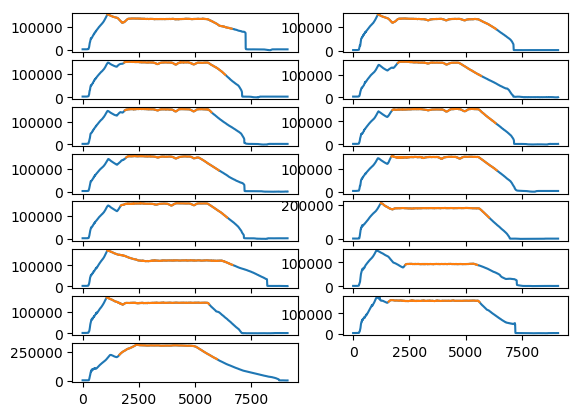

In [34]:
for i in 1:N
    subplot(ceil(Int, N/2),2,i)
    ip = AlfvenDetectors.makepositive(Ips[i])
    ts = collect(1:length(ip))
    plot(ts, ip)
    start,stop = AlfvenDetectors.flattopbe(ip,0.6,8e-4;wl=20)
    if stop-start > 100
        plot(ts[start:stop], ip[start:stop])
    end
end